In [1]:
import pandas as pd
import networkx as nx
import matplotlib as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [2]:
teams_df = pd.read_csv("cfb22.csv")
stats_df = teams_df[['Team','Opp Rush Yards Alloweed', 'Opp Pass Yds Allowed']]
stats_df

,Team,Opp Rush Yards Alloweed,Opp Pass Yds Allowed
0,Tennessee (SEC),1505,3764
1,Washington (Pac-12),1576,3269
2,Southern California (Pac-12),2237,3698
3,UCLA (Pac-12),1689,3549
4,Georgia (SEC),1156,3296
...,...,...,...
126,Rutgers (Big Ten),1715,2482
127,Colorado (Pac-12),2941,3176
128,Massachusetts (FBS Independent),2332,2103
129,Iowa (Big Ten),1317,2203


In [3]:
scaler = MinMaxScaler()
cols_to_normalize = [col for col in stats_df.columns if pd.api.types.is_numeric_dtype(teams_df[col])]
df_normalized = pd.DataFrame(stats_df[cols_to_normalize])
df_normalized[cols_to_normalize] = scaler.fit_transform(df_normalized[cols_to_normalize])
df_normalized = pd.concat([df_normalized, stats_df.drop(columns=cols_to_normalize)], axis=1)
df_normalized.head()

,Opp Rush Yards Alloweed,Opp Pass Yds Allowed,Team
0,0.296523,0.887324,Tennessee (SEC)
1,0.329887,0.654930,Washington (Pac-12)
2,0.640508,0.856338,Southern California (Pac-12)
3,0.382989,0.786385,UCLA (Pac-12)
4,0.132519,0.667606,Georgia (SEC)


<AxesSubplot:xlabel='Rush Yds', ylabel='Pass Yards'>

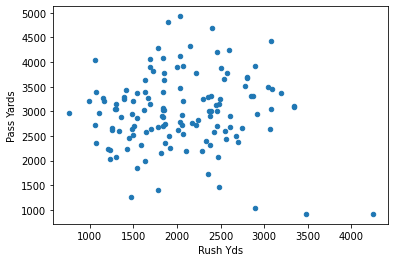

In [4]:
teams_df.plot.scatter(x='Opp Rush Yards Alloweed',y='Opp Pass Yds Allowed')